In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.metrics import classification_report, f1_score

xdawn_denoise_f1_svm\EEG_S01-Delta.pkl
              precision    recall  f1-score   support

         odd       0.84      0.81      0.83       560
        norm       0.95      0.96      0.96      2270

    accuracy                           0.93      2830
   macro avg       0.90      0.89      0.89      2830
weighted avg       0.93      0.93      0.93      2830



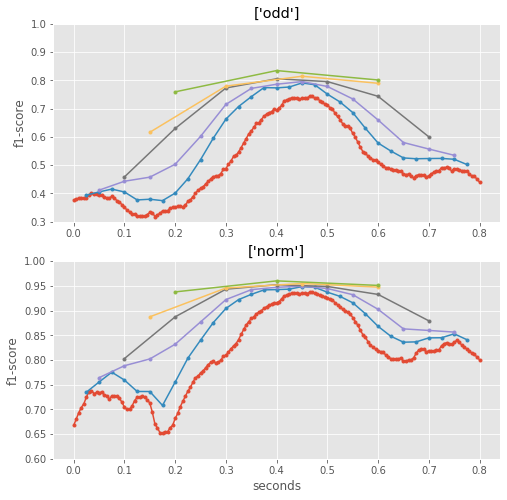

xdawn_denoise_f1_svm\EEG_S02-Delta.pkl
              precision    recall  f1-score   support

         odd       0.84      0.90      0.87       560
        norm       0.97      0.96      0.97      2264

    accuracy                           0.94      2824
   macro avg       0.91      0.93      0.92      2824
weighted avg       0.95      0.94      0.95      2824



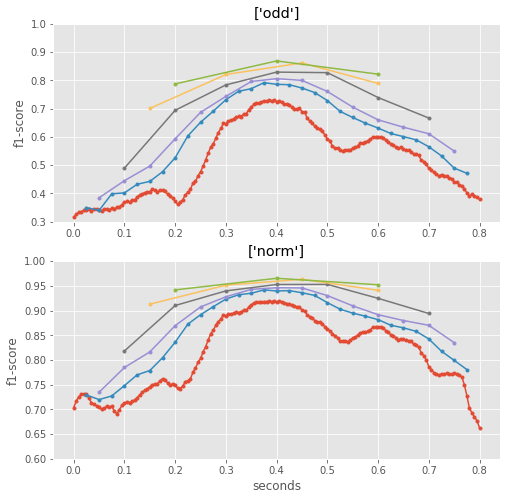

xdawn_denoise_f1_svm\MEG_S01-Delta.pkl
              precision    recall  f1-score   support

         odd       0.92      0.81      0.86       392
        norm       0.97      0.99      0.98      2321

    accuracy                           0.96      2713
   macro avg       0.94      0.90      0.92      2713
weighted avg       0.96      0.96      0.96      2713



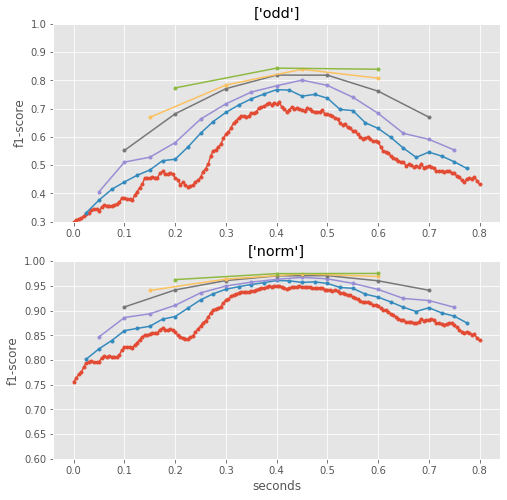

xdawn_denoise_f1_svm\MEG_S02-Delta.pkl
              precision    recall  f1-score   support

         odd       0.98      0.94      0.96       448
        norm       0.99      1.00      0.99      2594

    accuracy                           0.99      3042
   macro avg       0.99      0.97      0.98      3042
weighted avg       0.99      0.99      0.99      3042



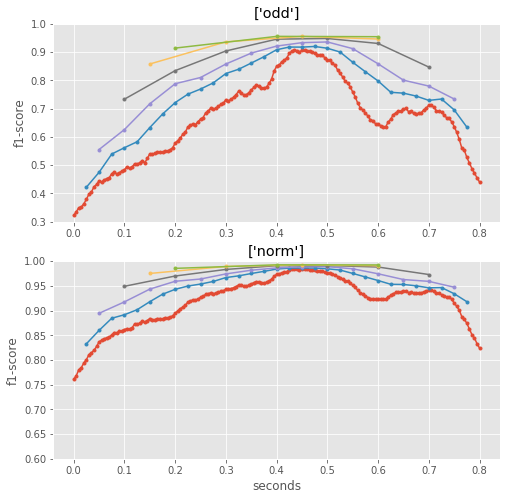

In [6]:
for data_id in ['EEG_S01', 'EEG_S02', 'MEG_S01', 'MEG_S02']:
    cls_name = 'xdawn_denoise_f1_svm'
    band_name = 'Delta'

    id, cls, band = data_id, cls_name, band_name

    pkl_file_name = os.path.join(cls, id + '-' + band + '.pkl')
    print(pkl_file_name)

    # Read file
    with open(pkl_file_name, 'rb') as f:
        results = pickle.load(f)

    # Fetch results
    times = results['times']
    window_info = results['time_windows']
    y_true = results['y_true']
    y_pred = results['y_pred']
    y_pred_time = results['y_pred_time']
    y_pred_timewindow = results['y_pred_timewindow']
    num_sample = len(y_true)
    num_time = len(times)

    # Report
    plt.style.use('ggplot')
    fig, axes = plt.subplots(2, 1, figsize=(8, 8))

    # All time
    report = classification_report(y_true, y_pred,
                                   target_names=['odd', 'norm'])
    print(report)

    length = max(times) - min(times)

    legend = []
    # Time resolution
    f1_time = np.empty([num_time, 2])
    for j in range(num_time):
        f1_time[j] = f1_score(y_true, y_pred_time[:, j], average=None)
    for j in range(2):
        axes[j].plot(times, f1_time[:, j], marker='.')

    # Time window
    for win_length, win_info in window_info.items():
        window_times = win_info[2]
        num_timewindow = len(window_times)
        f1_tmp = np.empty([num_timewindow, 2])
        for j in range(num_timewindow):
            f1_tmp[j] = f1_score(
                y_true, y_pred_timewindow[win_length][:, j], average=None)
        for j in range(2):
            axes[j].plot(window_times, f1_tmp[:, j], marker='.')

    # Append fig
    axes[0].set_title(['odd'])
    axes[0].set_ylabel('f1-score')
    axes[0].set_ylim((0.3, 1))
    axes[1].set_title(['norm'])
    axes[1].set_ylabel('f1-score')
    axes[1].set_ylim((0.6, 1))
    axes[1].set_xlabel('seconds')
    # fig.legend()
    # fig.suptitle(pkl_file_name)

    plt.rcParams.update({'font.size': 10})
    plt.show()